# Simplifed hypothesis
H(x) = W   
cost(W) = 1/m{ (Wx1-y1) + (Wx2-y2) + ... }

## Cost Function은 어떻게 생겼을까?

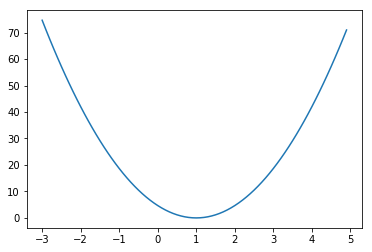

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# hypothesis
hypothesis = X*W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis-Y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

W_val=[]
cost_val=[]
for i in range(-30, 50):
    feed_W = i*0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

# show the cost function 
plt.plot(W_val, cost_val)
plt.show()

linear regression에서 cost function은 convex function 모양이다.    
따라서 gradient descent algorithm으로 cost를 최소화하는 W를 찾을 수 있다.

0 74.6667 5.0
1 61.3793 4.62667
2 50.4565 4.28818
3 41.4775 3.98128
4 34.0963 3.70303
5 28.0287 3.45075
6 23.0408 3.22201
7 18.9406 3.01462
8 15.57 2.82659
9 12.7992 2.65611
10 10.5216 2.50154
11 8.64918 2.36139
12 7.11001 2.23433
13 5.84474 2.11913
14 4.80464 2.01468
15 3.94963 1.91997
16 3.24677 1.83411
17 2.66899 1.75626
18 2.19403 1.68567
19 1.80359 1.62168
20 1.48263 1.56365
21 1.21879 1.51105
22 1.0019 1.46335
23 0.823605 1.4201
24 0.67704 1.38089
25 0.556556 1.34534
26 0.457514 1.31311
27 0.376097 1.28389
28 0.309169 1.25739
29 0.25415 1.23337
30 0.208923 1.21159
31 0.171744 1.19184
32 0.141181 1.17393
33 0.116057 1.1577
34 0.0954043 1.14298
35 0.0784266 1.12964
36 0.0644701 1.11754
37 0.0529974 1.10657
38 0.0435662 1.09662
39 0.0358134 1.0876
40 0.0294402 1.07943
41 0.0242011 1.07201
42 0.0198944 1.06529
43 0.0163541 1.0592
44 0.0134438 1.05367
45 0.0110514 1.04866
46 0.00908467 1.04412
47 0.00746802 1.04
48 0.00613906 1.03627
49 0.00504659 1.03288
50 0.00414851 1.02982
51 0.00

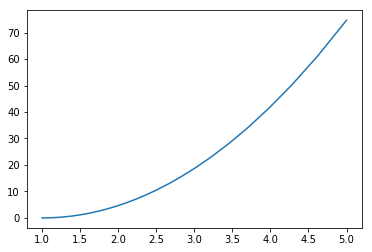

In [46]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(5.0)
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# hypothesis 
hypothesis = W*X
# cost
cost = tf.reduce_mean(tf.square(hypothesis-Y))

# Minimize
# gradientn descent algorithm 구현해 보기
# W:= W-a*1/m{(Wx1-y1)x1 + ...}
# a*1/m{(Wx1-y1)x1 + ...}는 cost function의 미분값
learning_rate = 0.01
gradient = tf.reduce_mean((W*X-Y)*X)*2
descent = W - learning_rate*gradient
update = W.assign(descent) # update는 W를 재할당하는 함수

sess = tf.Session()
sess.run(tf.global_variables_initializer())

W_val=[]
cost_val=[]
for step in range(100):
    curr_cost = sess.run(cost, feed_dict={X:x_data, Y:y_data})
    curr_W = sess.run(W)
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))
    sess.run(update, feed_dict={X:x_data, Y:y_data})
    
# show the cost function 
plt.plot(W_val, cost_val)
plt.show()

0 74.6667 5.0
1 61.3793 4.62667
2 50.4565 4.28818
3 41.4775 3.98128
4 34.0963 3.70303
5 28.0287 3.45075
6 23.0408 3.22201
7 18.9406 3.01462
8 15.57 2.82659
9 12.7992 2.65611
10 10.5216 2.50154
11 8.64918 2.36139
12 7.11001 2.23433
13 5.84474 2.11913
14 4.80464 2.01468
15 3.94963 1.91997
16 3.24677 1.83411
17 2.66899 1.75626
18 2.19403 1.68567
19 1.80359 1.62168
20 1.48263 1.56365
21 1.21879 1.51105
22 1.0019 1.46335
23 0.823605 1.4201
24 0.67704 1.38089
25 0.556556 1.34534
26 0.457514 1.31311
27 0.376097 1.28389
28 0.309169 1.25739
29 0.25415 1.23337
30 0.208923 1.21159
31 0.171744 1.19184
32 0.141181 1.17393
33 0.116057 1.1577
34 0.0954042 1.14298
35 0.0784264 1.12964
36 0.06447 1.11754
37 0.0529973 1.10657
38 0.0435661 1.09662
39 0.0358133 1.0876
40 0.0294401 1.07943
41 0.0242011 1.07201
42 0.0198943 1.06529
43 0.016354 1.0592
44 0.0134438 1.05367
45 0.0110514 1.04866
46 0.00908467 1.04412
47 0.00746802 1.04
48 0.00613906 1.03627
49 0.00504659 1.03288
50 0.00414851 1.02982
51 0.00341

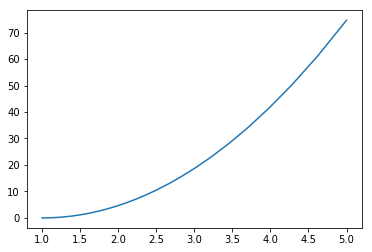

In [29]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(5.0)
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# hypothesis 
hypothesis = W*X
# cost
cost = tf.reduce_mean(tf.square(hypothesis-Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

W_val=[]
cost_val=[]
for step in range(100):
    curr_cost = sess.run(cost, feed_dict={X:x_data, Y:y_data})
    curr_W = sess.run(W)
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))
    sess.run(train, feed_dict={X:x_data, Y:y_data})
# show the cost function 
plt.plot(W_val, cost_val)
plt.show()

# Optional : compute_gradient and apply_gradient

In [45]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(5.0)
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# hypothesis 
hypothesis = W*X
# cost
cost = tf.reduce_mean(tf.square(hypothesis-Y))

# Manual gradient
gradient = tf.reduce_mean((W*X-Y)*X)*2

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# get gradients
gvs = optimizer.compute_gradients(cost, [W])
# apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run([gradient, W, gvs], feed_dict={X:x_data, Y:y_data}))
    sess.run(apply_gradients, feed_dict={X:x_data, Y:y_data})

0 [37.333332, 5.0, [(37.333336, 5.0)]]
1 [33.848888, 4.6266665, [(33.848888, 4.6266665)]]
2 [30.689657, 4.2881775, [(30.689657, 4.2881775)]]
3 [27.825287, 3.9812808, [(27.825287, 3.9812808)]]
4 [25.228262, 3.703028, [(25.228264, 3.703028)]]
5 [22.873621, 3.4507453, [(22.873623, 3.4507453)]]
6 [20.738752, 3.2220092, [(20.738752, 3.2220092)]]
7 [18.803137, 3.0146217, [(18.803137, 3.0146217)]]
8 [17.048176, 2.8265903, [(17.048176, 2.8265903)]]
9 [15.457013, 2.6561086, [(15.457014, 2.6561086)]]
10 [14.014359, 2.5015385, [(14.01436, 2.5015385)]]
11 [12.706352, 2.3613949, [(12.706352, 2.3613949)]]
12 [11.520427, 2.2343314, [(11.520427, 2.2343314)]]
13 [10.445186, 2.119127, [(10.445186, 2.119127)]]
14 [9.4703016, 2.0146751, [(9.4703016, 2.0146751)]]
15 [8.5864067, 1.9199722, [(8.5864067, 1.9199722)]]
16 [7.7850089, 1.8341081, [(7.7850089, 1.8341081)]]
17 [7.0584083, 1.756258, [(7.0584083, 1.756258)]]
18 [6.3996239, 1.685674, [(6.3996239, 1.685674)]]
19 [5.8023257, 1.6216778, [(5.8023257, 1.62